# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [3]:
import pandas as pd 
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [4]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

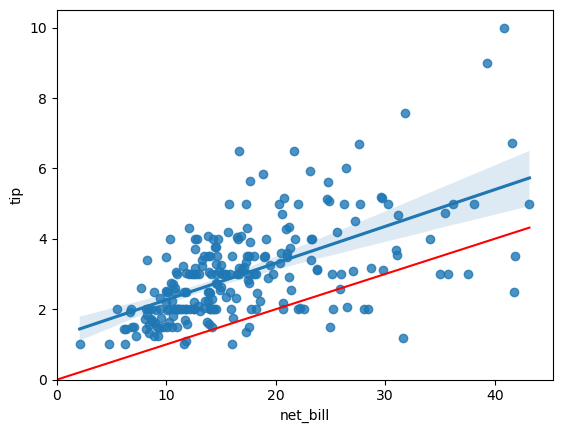

In [6]:
sns.regplot(y = "tip", x = "net_bill", data = tips[tips["tips_pct"]<.5])
x = np.linspace(0, tips["net_bill"].max(), 100)
y = .1*x
plt.plot(x, y, "-r", label="linha dos 10%")
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [7]:
reg = smf.ols("tip ~ net_bill", data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           5.02e-23
Time:                        05:43:27   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [8]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 4.536379207555543)

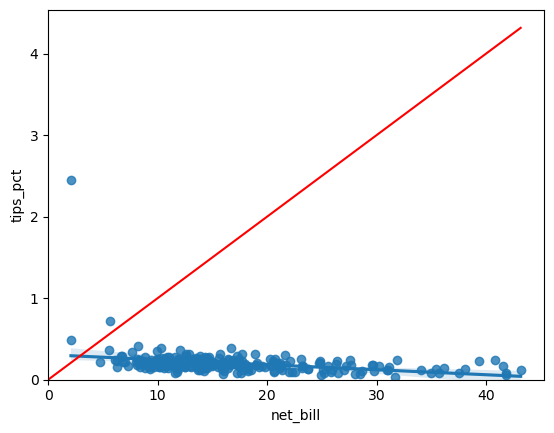

In [13]:
sns.regplot(y = "tips_pct", x = "net_bill", data = tips)
x = np.linspace(0, tips["net_bill"].max(), 100)
y = .1*x
plt.plot(x, y, "-r", label="linha dos 10%")
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [11]:
reg = smf.ols("net_bill ~ tips_pct", data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_bill   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        05:51:53   Log-Likelihood:                -842.41
No. Observations:                 244   AIC:                             1689.
Df Residuals:                     242   BIC:                             1696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7901      0.782     25.296      0.000      18.249      21.331
tips_pct     -14.8542      3.013     -4.931      0.000     -20.789      -8.920
==============================================================================
Omnibus:                       49.295   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.933
Skew:                           1.206   Prob(JB):                     8.82e-17
Kurtosis:                       4.207   Cond. No.                         6.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [14]:
print("Conseguimos reparar uma diferença grande de um gráfico para outro. Nesse estamos analisando a conta liquida com a porcentagem da gorjeta e conseguimos perceber que quanto maior for o valor da conta, menor é a porcentagem da gorjeta.")

Conseguimos reparar uma diferença grande de um gráfico para outro. Nesse estamos analisando a conta liquida com a porcentagem da gorjeta e conseguimos perceber que quanto maior for o valor da conta, menor é a porcentagem da gorjeta.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [32]:
dados_novos = tips["tips_pct"]
dados_novos

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tips_pct, Length: 244, dtype: float64

In [34]:
reg.fittedvalues(dados_novos)


TypeError: 'Series' object is not callable